# Mapping SNR to Eccentricity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

To be able to map between the relative SNR in each of the harmonics and the eccentricity of the system, we generate many sets of harmonics along the degeneracy line corresponding to the non-eccentric point found by quasi-circular parameter estimation.

We can then match these harmonics to an eccentric waveform at a fiducial point someway up this degeneracy line and record the relative SNRs.

## $\mathcal{M} = 24 M_\odot$

In [2]:
with open(os.path.join('grid_data', 'all_matches'), 'rb') as fp:
        grid_data = pickle.load(fp)

# Find min and max
chirp = list(grid_data.keys())[1]
for key in list(grid_data[chirp].keys()):
    if key not in ['fid_params', 'e_vals', 'ovlps', 'ovlps_perp'] and 'phase' not in key:
        grid_data[chirp][f'{key}_max'] = np.nanmax(np.array(grid_data[chirp][key]), axis=1)
        grid_data[chirp][f'{key}_min'] = np.nanmin(np.array(grid_data[chirp][key]), axis=1)

/home/ben.patterson/.conda/envs/eccentric_harmonics/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/ben.patterson/.conda/envs/eccentric_harmonics/lib/python3.10/site-packages/matplotlib/axes/_axes.py:5398: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
/home/ben.patterson/.conda/envs/eccentric_harmonics/lib/python3.10/site-packages/matplotlib/axes/_axes.py:5399: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
/home/ben.patterson/.conda/envs/eccentric_harmonics/lib/python3.10/site-packages/matplotlib/axes/_axes.py:5402: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
/home/ben.patterson/.conda/envs/eccentric_harmonics/lib/python3.10/site-packages/matplotlib/axes/_axes.py:5404: ComplexWarning: Casting complex values to 

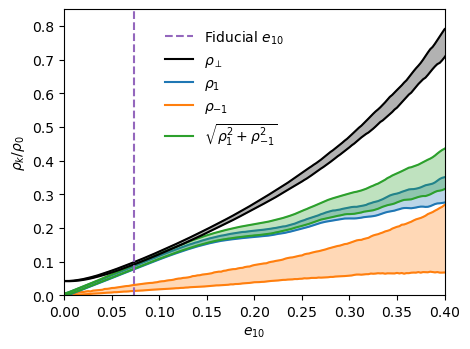

In [3]:
chirp = list(grid_data.keys())[1]

# Plot for each combination
plt.figure(figsize=(0.75*6.4, 0.75*4.8))
fid_e = chirp**(5/6)*0.035/(10**(5/6))
plt.axvline(fid_e, ls='dashed', c='C4', zorder=5/5, label='Fiducial $e_{10}$')
high_harm_min = np.sqrt(1-grid_data[chirp]['h0_max']**2)/grid_data[chirp]['h0_max']
high_harm_max = np.sqrt(1-grid_data[chirp]['h0_min']**2)/grid_data[chirp]['h0_min']
plt.plot(grid_data[chirp]['e_vals'], high_harm_max, c='k', zorder=4/5, label='$\\rho_{\\perp}$')
plt.plot(grid_data[chirp]['e_vals'], high_harm_min, c='k', zorder=4/5)
plt.fill_between(grid_data[chirp]['e_vals'], high_harm_min, high_harm_max, color='k', zorder=4/5, alpha=0.3)
plt.plot(grid_data[chirp]['e_vals'], grid_data[chirp]['h1_h0_max'], c='C0', zorder=2/5, label='$\\rho_1$')
plt.plot(grid_data[chirp]['e_vals'], grid_data[chirp]['h1_h0_min'], c='C0', zorder=2/5)
plt.fill_between(grid_data[chirp]['e_vals'], grid_data[chirp]['h1_h0_min'], 
                 grid_data[chirp]['h1_h0_max'], color='C0', zorder=2/5, alpha=0.3)
plt.plot(grid_data[chirp]['e_vals'], grid_data[chirp]['h-1_h0_max'], c='C1', zorder=1/5, label='$\\rho_{-1}$')
plt.plot(grid_data[chirp]['e_vals'], grid_data[chirp]['h-1_h0_min'], c='C1', zorder=1/5)
plt.fill_between(grid_data[chirp]['e_vals'], grid_data[chirp]['h-1_h0_min'], 
                 grid_data[chirp]['h-1_h0_max'], color='C1', zorder=1/5, alpha=0.3)
plt.plot(grid_data[chirp]['e_vals'], grid_data[chirp]['h1_h-1_h0_max'], c='C2', zorder=3/5, label='$\\sqrt{\\rho_1^2+\\rho_{-1}^2}$')
plt.plot(grid_data[chirp]['e_vals'], grid_data[chirp]['h1_h-1_h0_min'], c='C2', zorder=3/5)
plt.fill_between(grid_data[chirp]['e_vals'], grid_data[chirp]['h1_h-1_h0_min'], 
                 grid_data[chirp]['h1_h-1_h0_max'], color='C2', zorder=3/5, alpha=0.3)
plt.legend(frameon=False, loc=(0.25,0.50))
plt.xlim(0,0.4)
plt.ylim(0,0.85)
plt.xlabel('$e_{10}$')
plt.ylabel('$\\rho_k$/$\\rho_0$')
plt.tight_layout()
plt.savefig('Figures/min_max_lines.png', dpi=450, bbox_inches='tight')

## $\mathcal{M} = 10 M_\odot$

In [4]:
with open(os.path.join('grid_data', 'all_matches'), 'rb') as fp:
        grid_data = pickle.load(fp)

# Find min and max
chirp = list(grid_data.keys())[0]
for key in list(grid_data[chirp].keys()):
    if key not in ['fid_params', 'e_vals', 'ovlps', 'ovlps_perp'] and 'phase' not in key:
        grid_data[chirp][f'{key}_max'] = np.nanmax(np.array(grid_data[chirp][key]), axis=1)
        grid_data[chirp][f'{key}_min'] = np.nanmin(np.array(grid_data[chirp][key]), axis=1)

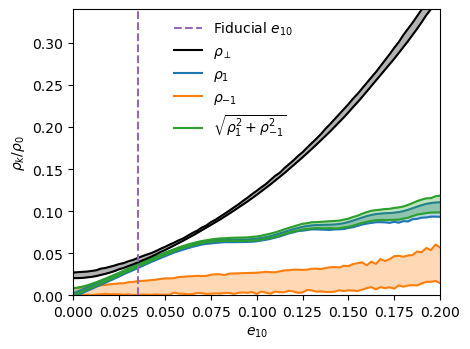

In [5]:
chirp = list(grid_data.keys())[0]

# Plot for each combination
plt.figure(figsize=(0.75*6.4, 0.75*4.8))
fid_e = chirp**(5/6)*0.035/(10**(5/6))
plt.axvline(fid_e, ls='dashed', c='C4', zorder=5/5, label='Fiducial $e_{10}$')
high_harm_min = np.sqrt(1-grid_data[chirp]['h0_max']**2)/grid_data[chirp]['h0_max']
high_harm_max = np.sqrt(1-grid_data[chirp]['h0_min']**2)/grid_data[chirp]['h0_min']
plt.plot(grid_data[chirp]['e_vals'], high_harm_max, c='k', zorder=4/5, label='$\\rho_{\\perp}$')
plt.plot(grid_data[chirp]['e_vals'], high_harm_min, c='k', zorder=4/5)
plt.fill_between(grid_data[chirp]['e_vals'], high_harm_min, high_harm_max, color='k', zorder=4/5, alpha=0.3)
plt.plot(grid_data[chirp]['e_vals'], grid_data[chirp]['h1_h0_max'], c='C0', zorder=2/5, label='$\\rho_1$')
plt.plot(grid_data[chirp]['e_vals'], grid_data[chirp]['h1_h0_min'], c='C0', zorder=2/5)
plt.fill_between(grid_data[chirp]['e_vals'], grid_data[chirp]['h1_h0_min'], 
                 grid_data[chirp]['h1_h0_max'], color='C0', zorder=2/5, alpha=0.3)
plt.plot(grid_data[chirp]['e_vals'], grid_data[chirp]['h-1_h0_max'], c='C1', zorder=1/5, label='$\\rho_{-1}$')
plt.plot(grid_data[chirp]['e_vals'], grid_data[chirp]['h-1_h0_min'], c='C1', zorder=1/5)
plt.fill_between(grid_data[chirp]['e_vals'], grid_data[chirp]['h-1_h0_min'], 
                 grid_data[chirp]['h-1_h0_max'], color='C1', zorder=1/5, alpha=0.3)
plt.plot(grid_data[chirp]['e_vals'], grid_data[chirp]['h1_h-1_h0_max'], c='C2', zorder=3/5, label='$\\sqrt{\\rho_1^2+\\rho_{-1}^2}$')
plt.plot(grid_data[chirp]['e_vals'], grid_data[chirp]['h1_h-1_h0_min'], c='C2', zorder=3/5)
plt.fill_between(grid_data[chirp]['e_vals'], grid_data[chirp]['h1_h-1_h0_min'], 
                 grid_data[chirp]['h1_h-1_h0_max'], color='C2', zorder=3/5, alpha=0.3)
plt.legend(frameon=False, loc=(0.26,0.53))
plt.xlim(0,0.2)
plt.ylim(0,0.34)
plt.xlabel('$e_{10}$')
plt.ylabel('$\\rho_k$/$\\rho_0$')
plt.tight_layout()
plt.savefig('Figures/min_max_lines_10msun.png', dpi=450, bbox_inches='tight')

## $\mathcal{M} = 40 M_\odot$

In [2]:
with open(os.path.join('grid_data', 'all_matches'), 'rb') as fp:
        grid_data = pickle.load(fp)

# Find min and max
chirp = list(grid_data.keys())[2]
for key in list(grid_data[chirp].keys()):
    if key not in ['fid_params', 'e_vals', 'ovlps', 'ovlps_perp'] and 'phase' not in key:
        grid_data[chirp][f'{key}_max'] = np.nanmax(np.array(grid_data[chirp][key]), axis=1)
        grid_data[chirp][f'{key}_min'] = np.nanmin(np.array(grid_data[chirp][key]), axis=1)

/home/ben.patterson/.conda/envs/eccentric_harmonics/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/ben.patterson/.conda/envs/eccentric_harmonics/lib/python3.10/site-packages/matplotlib/axes/_axes.py:5398: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
/home/ben.patterson/.conda/envs/eccentric_harmonics/lib/python3.10/site-packages/matplotlib/axes/_axes.py:5399: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
/home/ben.patterson/.conda/envs/eccentric_harmonics/lib/python3.10/site-packages/matplotlib/axes/_axes.py:5402: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
/home/ben.patterson/.conda/envs/eccentric_harmonics/lib/python3.10/site-packages/matplotlib/axes/_axes.py:5404: ComplexWarning: Casting complex values to 

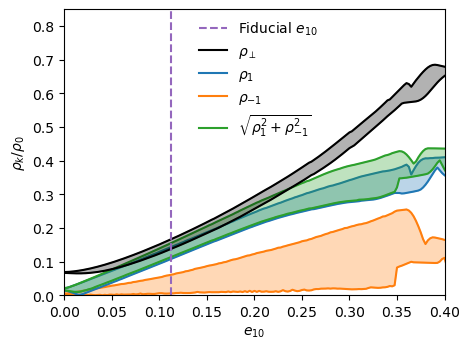

In [3]:
chirp = list(grid_data.keys())[2]

# Plot for each combination
plt.figure(figsize=(0.75*6.4, 0.75*4.8))
fid_e = chirp**(5/6)*0.035/(10**(5/6))
plt.axvline(fid_e, ls='dashed', c='C4', zorder=5/5, label='Fiducial $e_{10}$')
high_harm_min = np.sqrt(1-grid_data[chirp]['h0_max']**2)/grid_data[chirp]['h0_max']
high_harm_max = np.sqrt(1-grid_data[chirp]['h0_min']**2)/grid_data[chirp]['h0_min']
plt.plot(grid_data[chirp]['e_vals'], high_harm_max, c='k', zorder=4/5, label='$\\rho_{\\perp}$')
plt.plot(grid_data[chirp]['e_vals'], high_harm_min, c='k', zorder=4/5)
plt.fill_between(grid_data[chirp]['e_vals'], high_harm_min, high_harm_max, color='k', zorder=4/5, alpha=0.3)
plt.plot(grid_data[chirp]['e_vals'], grid_data[chirp]['h1_h0_max'], c='C0', zorder=2/5, label='$\\rho_1$')
plt.plot(grid_data[chirp]['e_vals'], grid_data[chirp]['h1_h0_min'], c='C0', zorder=2/5)
plt.fill_between(grid_data[chirp]['e_vals'], grid_data[chirp]['h1_h0_min'], 
                 grid_data[chirp]['h1_h0_max'], color='C0', zorder=2/5, alpha=0.3)
plt.plot(grid_data[chirp]['e_vals'], grid_data[chirp]['h-1_h0_max'], c='C1', zorder=1/5, label='$\\rho_{-1}$')
plt.plot(grid_data[chirp]['e_vals'], grid_data[chirp]['h-1_h0_min'], c='C1', zorder=1/5)
plt.fill_between(grid_data[chirp]['e_vals'], grid_data[chirp]['h-1_h0_min'], 
                 grid_data[chirp]['h-1_h0_max'], color='C1', zorder=1/5, alpha=0.3)
plt.plot(grid_data[chirp]['e_vals'], grid_data[chirp]['h1_h-1_h0_max'], c='C2', zorder=3/5, label='$\\sqrt{\\rho_1^2+\\rho_{-1}^2}$')
plt.plot(grid_data[chirp]['e_vals'], grid_data[chirp]['h1_h-1_h0_min'], c='C2', zorder=3/5)
plt.fill_between(grid_data[chirp]['e_vals'], grid_data[chirp]['h1_h-1_h0_min'], 
                 grid_data[chirp]['h1_h-1_h0_max'], color='C2', zorder=3/5, alpha=0.3)
plt.legend(frameon=False, loc=(0.34,0.53))
plt.xlim(0,0.4)
plt.ylim(0,0.85)
plt.xlabel('$e_{10}$')
plt.ylabel('$\\rho_k$/$\\rho_0$')
plt.tight_layout()
plt.savefig('Figures/min_max_lines_40msun.png', dpi=450, bbox_inches='tight')

In [4]:
from calcwf import *

/home/ben.patterson/.conda/envs/eccentric_harmonics/lib/python3.10/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


lal.MSUN_SI != Msun
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new


/home/ben.patterson/.conda/envs/eccentric_harmonics/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
# Get fiducial waveform
zero_ecc_chirp = 40.27667198778691
f_low = grid_data[zero_ecc_chirp]['fid_params']['f_low']
e = grid_data[zero_ecc_chirp]['fid_params']['e']
M = grid_data[zero_ecc_chirp]['fid_params']['M']
q = grid_data[zero_ecc_chirp]['fid_params']['q']
n = grid_data[zero_ecc_chirp]['fid_params']['n']
n_gen = grid_data[zero_ecc_chirp]['fid_params']['n_gen']
sample_rate = grid_data[zero_ecc_chirp]['fid_params']['sample_rate']
approximant = grid_data[zero_ecc_chirp]['fid_params']['approximant']
all_wfs = list(get_h([1]*n_gen, f_low, e, M, q, sample_rate, approximant=approximant))
fid_harms = all_wfs[1:n+1]

# Setup params for trial waveforms at e=0.4
trial_e = 0.4
trial_chirp = chirp_degeneracy_line(zero_ecc_chirp, trial_e, sample_rate, f_low=f_low, q=q)
s_f_2pi = f_low - shifted_f(f_low, trial_e, chirp2total(trial_chirp, q), q)
s_f_vals = f_low - np.linspace(0, 2.5*np.pi, 40, endpoint=False)*s_f_2pi/(2*np.pi)
s_e_vals = shifted_e(s_f_vals, f_low, trial_e)

# Get psd that would've been used
long_s_f_2pi = f_low - shifted_f(f_low, 0, chirp2total(zero_ecc_chirp, q), q)
long_s_f_vals = f_low - np.linspace(0, 2.5*np.pi, 40, endpoint=False)*s_f_2pi/(2*np.pi)
long_s_e_vals = shifted_e(long_s_f_vals, f_low, 0)
long_wf = gen_wf(np.min(long_s_f_vals), np.max(long_s_e_vals), chirp2total(zero_ecc_chirp, q), q, sample_rate, approximant)
fid_harms = resize_wfs(fid_harms, tlen=ceiltwo(len(long_wf)))
h_psd = timeseries.TimeSeries(list(fid_harms[0].copy())+[0], fid_harms[0].delta_t, epoch=fid_harms[0].start_time)
psd = gen_psd(h_psd, f_low)

# Generate and match trial waveforms
h0_arr = []
h1_arr = []
hn1_arr = []
h2_arr = []
for i, (s_f, s_e) in enumerate(zip(s_f_vals, s_e_vals)):
    s = gen_wf(s_f, s_e, chirp2total(trial_chirp, q), q, sample_rate, approximant=approximant)
    match_cplx = match_hn(fid_harms, s, f_low, psd=psd)
    h0_arr.append(np.abs(match_cplx[0]))
    h1_arr.append(np.abs(match_cplx[1]))
    hn1_arr.append(np.abs(match_cplx[2]))
    h2_arr.append(np.abs(match_cplx[3]))
    print(f'\r{i+1} done of {len(s_f_vals)}.', end='')
h0_arr = np.array(h0_arr)
h1_arr = np.array(h1_arr)
hn1_arr = np.array(hn1_arr)
h2_arr = np.array(h2_arr)

# Print example of min/max of h-1/h0
print('\n', np.max(hn1_arr/h0_arr), np.min(hn1_arr/h0_arr))

/home/ben.patterson/.conda/envs/eccentric_harmonics/lib/python3.10/site-packages/pycbc/types/array.py:435: RuntimeWarning: divide by zero encountered in power
  return self._data ** other
/home/ben.patterson/.conda/envs/eccentric_harmonics/lib/python3.10/site-packages/pycbc/types/array.py:348: RuntimeWarning: invalid value encountered in multiply
  return self._data * other


40 done of 40.
 0.31577505212604573 0.0038290251621914437


In [6]:
grid_data[zero_ecc_chirp]

{'h0': array([[0.99769239, 0.99768975, 0.99768335, ..., 0.99774286, 0.99773906,
         0.99773522],
        [0.99766944, 0.9976638 , 0.99765404, ..., 0.99771727, 0.9977182 ,
         0.99771977],
        [0.997638  , 0.99762756, 0.99761596, ..., 0.9976819 , 0.99768704,
         0.99769443],
        ...,
        [0.78862762, 0.78774245, 0.78673078, ..., 0.72475277, 0.72071092,
         0.71787318],
        [0.78671949, 0.78564717, 0.78447982, ..., 0.71570211, 0.71480645,
         0.71531836],
        [0.78473975, 0.7836309 , 0.78258299, ..., 0.71454594, 0.71688127,
         0.72027914]]),
 'h0_phase': array([[-2.00920955, -1.6045488 , -1.09774738, ..., -2.69957632,
         -2.19232035, -1.58307186],
        [-1.9819859 , -1.57841515, -1.0705368 , ..., -2.67484201,
         -2.16790563, -1.67503797],
        [-2.01208443, -1.60971245, -1.10274042, ..., -2.70756868,
         -2.20092303, -1.59139402],
        ...,
        [ 0.88537622,  0.90316283,  1.0293736 , ...,  2.89073014,
      

In [14]:
0.03519393**(6/5)*10/(0.035**(6/5))

10.066527072731718

In [15]:
chirp_degeneracy_line(10.066527072731718, 0.03519393)

10.064676675031302